# Coin flipping: the quantum hello world
In this first simple example, we produce a 1-qubit state in superposition between 0 and 1 (through a Hadamard gate), and perform a measurement in the computational basis. The output should simulate a coin flip.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import qutip as qt

## Creating the circuit
We use qt.snot() to create an Hadamard gate $\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$
, which turns the qubit $|0 \rangle$ into $\frac{1}{\sqrt{2}} (|0 \rangle + |1 \rangle)$


In [2]:
def circuit(q_in):
    return qt.snot() * q_in

In [3]:
q_in = qt.Qobj([[1],[0]])
q_in

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]]

In [4]:
q_out = circuit(q_in)
q_out

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [ 0.70710678]]

In [21]:
q_out.full()[0]

array([ 0.70710678+0.j])

## Defining a measurement in the computational basis (CB)

In [29]:
def measure_cb(psi, nb_measurements):
    dim_space = q_out.dims[0][0]
#     list_states = [qt.basis(dim_space,i) for i in range(dim_space)]
    list_states = range(dim_space)
    list_probas = [np.abs(q_out.full()[i][0])**2 for i in range(dim_space)]
    
    return np.random.choice(list_states, size=nb_measurements, p=list_probas)

## Results

In [31]:
output_measurement = measure_cb(q_out, 1000)

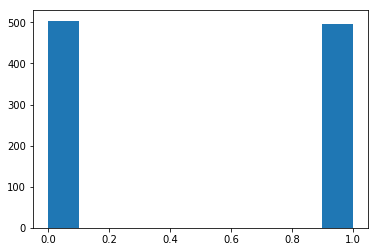

In [36]:
_ = plt.hist(output_measurement)